# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

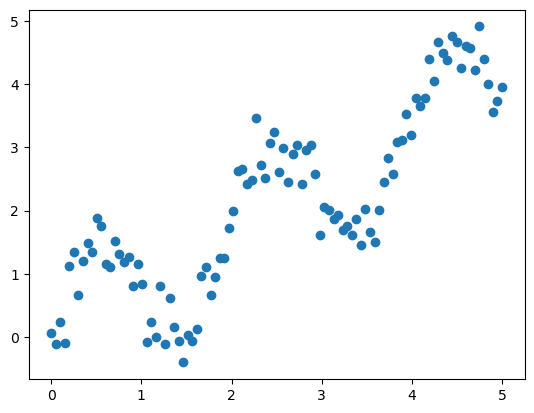

In [5]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [8]:
X = x.reshape(-1, 1)  # (-1:rows for Auto, 1:new_columns) dimension to 2D
print(X.shape)

(100, 1)


In [9]:
regr_lin.fit(X,y)  # training model

LinearRegression()

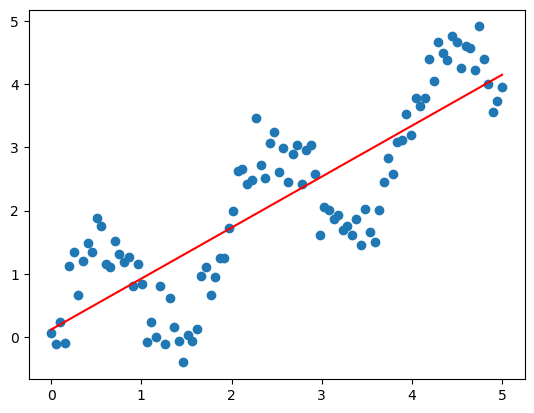

0.6241231612433552


In [10]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
plt.show()
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [14]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it, get (100,6) dimensions
print(X_poly.shape)

(100, 5)


In [15]:
regr_poly = LinearRegression()

In [16]:
regr_poly.fit(X_poly, y)  # training by X-poly data

LinearRegression()

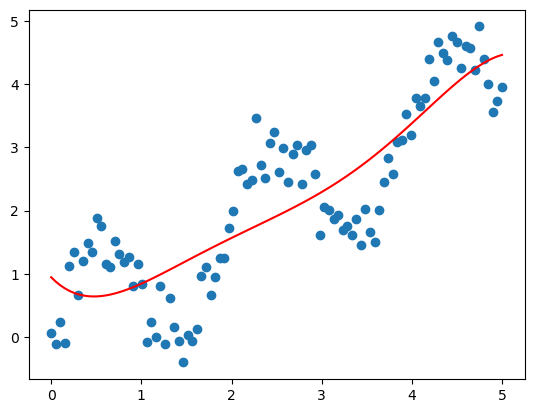

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
plt.show()

In [19]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)
# $$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$ ; 算出interception及所有係數再代入方程式計算預測結果

Coefficients:  [-1.46685633  2.16120268 -0.98879215  0.20812887 -0.01588905]
interception:  0.9436717354260109


In [21]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b     # Matri相乘注意維度， W.T為轉置Matrix [5,1] to [1,5]

array([0.94367174, 0.87497476, 0.81655771, 0.76770426, 0.72772932,
       0.69597845, 0.67182716, 0.65468037, 0.64397171, 0.63916294,
       0.63974329, 0.64522889, 0.65516205, 0.66911074, 0.68666787,
       0.70745073, 0.73110034, 0.75728079, 0.78567869, 0.81600247,
       0.84798179, 0.88136689, 0.91592801, 0.95145471, 0.98775528,
       1.02465608, 1.06200094, 1.09965055, 1.13748177, 1.17538707,
       1.21327387, 1.25106393, 1.28869269, 1.32610869, 1.3632729 ,
       1.40015813, 1.43674839, 1.47303825, 1.50903222, 1.54474414,
       1.58019654, 1.61542001, 1.65045258, 1.68533908, 1.72013055,
       1.75488356, 1.78965964, 1.82452461, 1.85954796, 1.89480226,
       1.93036247, 1.96630538, 2.00270893, 2.03965162, 2.07721188,
       2.1154674 , 2.15449456, 2.19436778, 2.23515889, 2.2769365 ,
       2.31976539, 2.36370587, 2.40881315, 2.45513673, 2.50271976,
       2.55159843, 2.60180131, 2.65334875, 2.70625226, 2.76051387,
       2.81612549, 2.8730683 , 2.93131214, 2.99081485, 3.05152

In [22]:
regr_poly.predict(X_poly)  # 直接用predict計算出X_poly預測數值

array([0.94367174, 0.87497476, 0.81655771, 0.76770426, 0.72772932,
       0.69597845, 0.67182716, 0.65468037, 0.64397171, 0.63916294,
       0.63974329, 0.64522889, 0.65516205, 0.66911074, 0.68666787,
       0.70745073, 0.73110034, 0.75728079, 0.78567869, 0.81600247,
       0.84798179, 0.88136689, 0.91592801, 0.95145471, 0.98775528,
       1.02465608, 1.06200094, 1.09965055, 1.13748177, 1.17538707,
       1.21327387, 1.25106393, 1.28869269, 1.32610869, 1.3632729 ,
       1.40015813, 1.43674839, 1.47303825, 1.50903222, 1.54474414,
       1.58019654, 1.61542001, 1.65045258, 1.68533908, 1.72013055,
       1.75488356, 1.78965964, 1.82452461, 1.85954796, 1.89480226,
       1.93036247, 1.96630538, 2.00270893, 2.03965162, 2.07721188,
       2.1154674 , 2.15449456, 2.19436778, 2.23515889, 2.2769365 ,
       2.31976539, 2.36370587, 2.40881315, 2.45513673, 2.50271976,
       2.55159843, 2.60180131, 2.65334875, 2.70625226, 2.76051387,
       2.81612549, 2.8730683 , 2.93131214, 2.99081485, 3.05152

In [23]:
Y_poly = regr_poly.predict(X_poly)  # 直接用predict計算出X_poly預測數值
mse = np.sum((Y_poly-y)**2) / len(y)
print(mse)

0.5668406674140497


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [51]:
# normal distrubution，最常見的是Gaussian Distribution的函數,用於非線性函數
# Radial Basis Function，徑向基底函數，以某中心點為基準，距離越遠，輸出越小
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [52]:
sigma = 0.3   # sigma大小影響對數據的敏感度，過大會Underfitting，過小會overfitting

In [84]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [70]:
X_rbf1 = np.array([[RBF(k, .2, sigma), 
                  RBF(k, 1.2, sigma),
                  RBF(k, 2.2, sigma),
                  RBF(k, 3.2, sigma),
                  RBF(k, 4.2, sigma)] for k in x])

print(X_rbf1)

[[8.00737403e-01 3.35462628e-04 2.10040929e-12 1.96548382e-25
  2.74878501e-43]
 [8.83238806e-01 6.48550804e-04 7.11730568e-12 1.16732824e-24
  2.86138385e-42]
 [9.47016380e-01 1.21880768e-03 2.34432937e-11 6.73919204e-24
  2.89536148e-41]
 [9.87025018e-01 2.22647428e-03 7.50607604e-11 3.78193442e-23
  2.84787409e-40]
 [9.99977327e-01 3.95358886e-03 2.33613864e-10 2.06305819e-22
  2.72289001e-39]
 [9.84789630e-01 6.82427703e-03 7.06765900e-10 1.09395708e-21
  2.53064213e-38]
 [9.42731681e-01 1.14502011e-02 2.07847059e-09 5.63871844e-21
  2.28624460e-37]
 [8.77251378e-01 1.86750125e-02 5.94160124e-09 2.82521731e-20
  2.00773306e-36]
 [7.93508052e-01 2.96073823e-02 1.65102801e-08 1.37598794e-19
  1.71388063e-35]
 [6.97701953e-01 4.56278959e-02 4.45960818e-08 6.51431448e-19
  1.42215356e-34]
 [5.96320666e-01 6.83521524e-02 1.17092826e-07 2.99787923e-18
  1.14710649e-33]
 [4.95428635e-01 9.95325818e-02 2.98851329e-07 1.34106821e-17
  8.99398800e-33]
 [4.00104716e-01 1.40886593e-01 7.414321

In [71]:
X_rbf2 = np.array([[RBF(k, .8, sigma), 
                  RBF(k, 1.8, sigma),
                  RBF(k, 2.8, sigma),
                  RBF(k, 3.8, sigma),
                  RBF(k, 4.8, sigma)] for k in x])

print(X_rbf2)

[[2.85655008e-02 1.52299797e-08 1.21356367e-19 1.44521201e-35
  2.57220937e-56]
 [4.41221805e-02 4.12312291e-08 5.75839367e-19 1.20193831e-34
  3.74946033e-55]
 [6.62465726e-02 1.08503703e-07 2.65602073e-18 9.71681911e-34
  5.31278856e-54]
 [9.66854634e-02 2.77558261e-07 1.19083856e-17 7.63584981e-33
  7.31758242e-53]
 [1.37167200e-01 6.90168412e-07 5.18997948e-17 5.83286547e-32
  9.79724650e-52]
 [1.89160601e-01 1.66819694e-06 2.19871892e-16 4.33109653e-31
  1.27506337e-50]
 [2.53572656e-01 3.91950195e-06 9.05451325e-16 3.12611599e-30
  1.61306112e-49]
 [3.30419351e-01 8.95170519e-06 3.62453105e-15 2.19332826e-29
  1.98363244e-48]
 [4.18523503e-01 1.98733911e-05 1.41035961e-14 1.49586880e-28
  2.37117114e-47]
 [5.15306416e-01 4.28873792e-05 5.33456759e-14 9.91687168e-28
  2.75521771e-46]
 [6.16740645e-01 8.99659891e-05 1.96137170e-13 6.39068197e-27
  3.11200484e-45]
 [7.17514881e-01 1.83450344e-04 7.00990136e-13 4.00323458e-26
  3.41677144e-44]
 [8.11429096e-01 3.63621895e-04 2.435315

In [54]:
regr_rbf = LinearRegression()

In [85]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

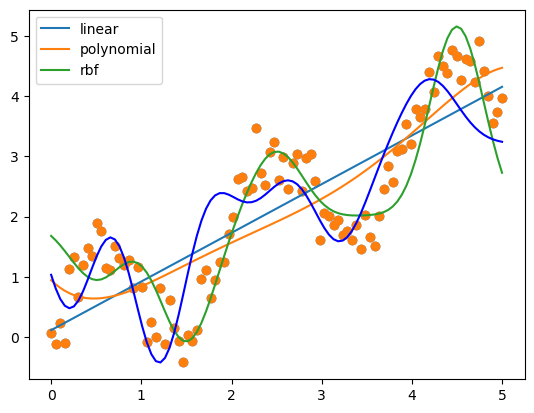

In [72]:
Y_rbf1 = regr_rbf.fit(X_rbf1, y)
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf1), 'b')
plt.show()

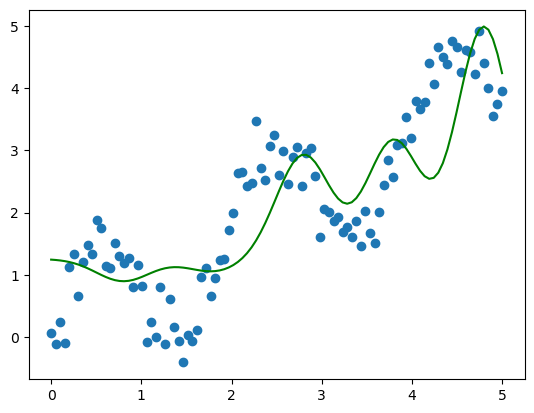

In [73]:
Y_rbf2 = regr_rbf.fit(X_rbf2, y)
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf2), 'g')
plt.show()

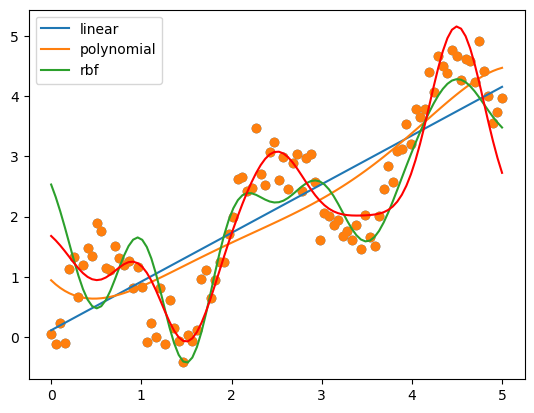

In [56]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [86]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.96501024 -1.9931249   1.16659652  0.08558346  3.23466846]
interception:  1.9190598450999852


#### Comparison

In [87]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

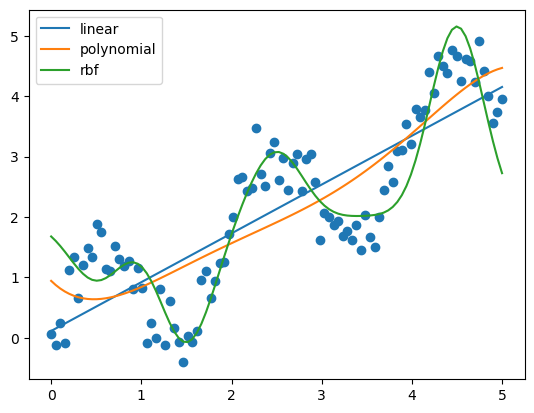

In [88]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [89]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6241231612433552


In [90]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5668406674140497


In [91]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3025568149053313
